In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
path_nac = "../Data/clean data/nacimientos/Serie_nacimientos_1992-2022.parquet"
path_censo2024_edu = "../Data/clean data/censo/2024/censo_2024_educacion.csv"
path_censo2024_fecu = "../Data/clean data/censo/2024/censo_2024_fecundidad.csv"
path_censo2024_pob = "../Data/clean data/censo/2024/censo_2024_poblacion.csv"

In [66]:
df_nac = pd.read_parquet(path_nac)

In [67]:
df_nac

,Mes,Anio,Sexo,Rango_edad_M,Educacion_M,Rango_edad_P,Educacion_P,Region
0,1.0,1992,1,30 A 34,2,35 A 39,6.0,VALPARAISO
1,1.0,1992,1,30 A 34,4,40 A 44,1.0,NUBLE
2,1.0,1992,1,25 A 29,6,35 A 39,6.0,METROPOLITANA
3,1.0,1992,1,20 A 24,4,25 A 29,4.0,LA ARAUCANIA
5,1.0,1992,1,20 A 24,8,40 A 44,5.0,ARICA Y PARINACOTA
...,...,...,...,...,...,...,...,...
7445226,12.0,2022,2,45 A 49,8,45 A 49,8.0,MAULE
7445231,12.0,2022,2,35 A 39,3,20 A 24,4.0,BIOBIO
7445236,12.0,2022,2,20 A 24,8,30 A 34,2.0,METROPOLITANA
7445243,12.0,2022,2,35 A 39,2,35 A 39,8.0,MAULE


In [68]:
df_nac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3073501 entries, 0 to 7445244
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Mes           float64
 1   Anio          int64  
 2   Sexo          int64  
 3   Rango_edad_M  object 
 4   Educacion_M   int64  
 5   Rango_edad_P  object 
 6   Educacion_P   float64
 7   Region        object 
dtypes: float64(2), int64(3), object(3)
memory usage: 211.0+ MB


In [69]:
df_nac["Anio"] = df_nac["Anio"].astype('Int64')

In [70]:
df_nac['Mes'] = df_nac['Mes'].astype("Int64")

Cual es la tendencia de los nacimientos en el tiempo?

In [71]:
df_nac['Fecha'] = pd.to_datetime(df_nac["Anio"].astype(str) + '-' + df_nac['Mes'].astype(str))

In [72]:
nacimientos_por_mes = df_nac.groupby('Fecha').size().reset_index(name='Total_Nacimientos')

In [73]:
nacimientos_por_mes= nacimientos_por_mes.sort_values('Fecha')

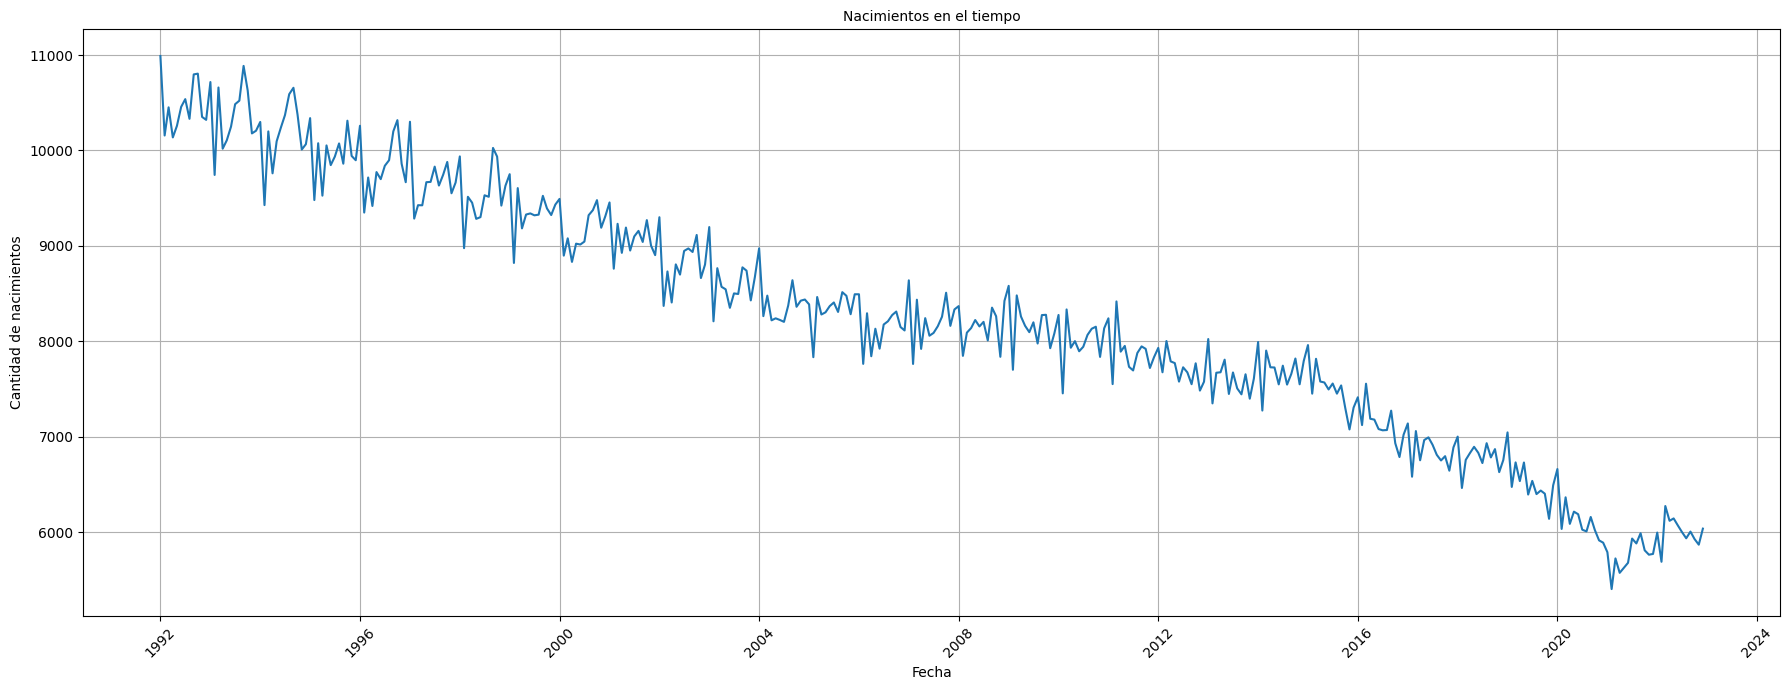

In [74]:
plt.figure(figsize=(18, 7))

plt.plot(
    nacimientos_por_mes['Fecha'],
    nacimientos_por_mes['Total_Nacimientos'],
    linestyle = '-'
)

plt.title('Nacimientos en el tiempo', fontsize = 10)
plt.xlabel("Fecha")
plt.ylabel('Cantidad de nacimientos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Notamos clara tendencia a la bajada, importante

In [75]:
nac_por_eduM = df_nac.groupby(['Anio', "Educacion_M"]).size().reset_index(name='Total_nacimientos')

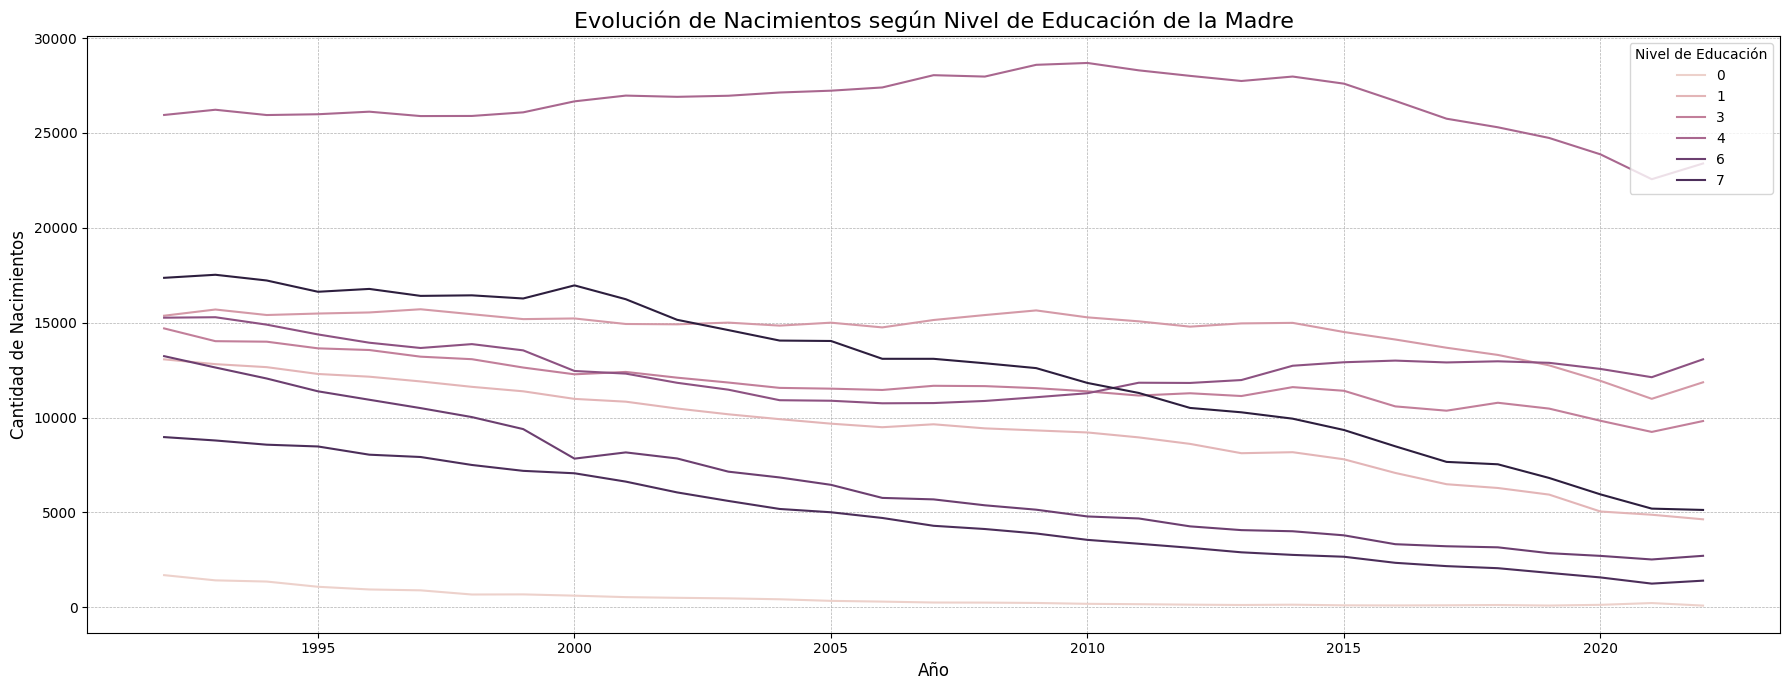

In [76]:
plt.figure(figsize=(18, 7))

sns.lineplot(
    data = nac_por_eduM,
    x= "Anio",
    y= 'Total_nacimientos',
    hue= 'Educacion_M',
    markers= "o"
)
plt.title('Evolución de Nacimientos según Nivel de Educación de la Madre', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Nacimientos', fontsize=12)
plt.legend(title='Nivel de Educación')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()